In [1]:
!conda install -y gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    conda-24.3.0               |  py310hff52083_0         920 KB  conda-forge
    filelock-3.13.3            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.2.1              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock

In [2]:
!gdown --id 1yqkIVhUwInBzefGWfcAskmIrvKWtMCRZ

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1yqkIVhUwInBzefGWfcAskmIrvKWtMCRZ
From (redirected): https://drive.google.com/uc?id=1yqkIVhUwInBzefGWfcAskmIrvKWtMCRZ&confirm=t&uuid=14c17774-65cc-42cb-ac9e-f1602af9b408
To: /kaggle/working/dataset.csv
100%|███████████████████████████████████████| 8.25G/8.25G [01:20<00:00, 102MB/s]


In [25]:
import pandas as pd
import math
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./dataset.csv')


In [13]:
data.columns=["user_ip","domain","timestamp","attack","request","len","subdomains_count","w_count","w_max","entropy","w_max_ratio","w_count_ratio","digits_ratio","uppercase_ratio","time_avg","time_stdev","size_avg","size_stdev","throughput","unique","entropy_avg","entropy_stdev"]
data.head()

,user_ip,domain,timestamp,attack,request,len,subdomains_count,w_count,w_max,entropy,...,digits_ratio,uppercase_ratio,time_avg,time_stdev,size_avg,size_stdev,throughput,unique,entropy_avg,entropy_stdev
3942,186.169.146.147,e5.sk,1624438294225,1,sebubx76xk4erpp3rwehoo3ubmbqeaqbaeaq.a.e.e5.sk,40,3,3,3,3.975071,...,0.125,0.0,2197.222222,2875.261022,48.2,53.370404,24.372977,0.0,3.691242,0.910175
4297,186.169.146.147,e5.sk,1624438295586,1,4az3kiecotwu3okbtvfm7pdpcabqeaqbaeaq.a.e.e5.sk,40,3,5,3,4.146439,...,0.100,0.0,2348.444444,2779.448601,48.2,53.370404,22.803615,0.0,3.685581,0.906808
4590,186.169.146.147,e5.sk,1624438296656,1,x3i2wbqsiucuviqyfaaoxz3lzybqeaqbaeaq.a.e.e5.sk,40,3,1,3,3.987326,...,0.075,0.0,2460.111111,2695.151964,51.8,51.228898,23.394454,0.0,3.884313,0.687639
6096,186.169.127.58,e5.sk,1624438302237,1,ez2vzwchw3ce5m6wz6cw3nnc2ibqeaqbaeaq.a.e.e5.sk,40,3,1,3,3.893943,...,0.175,0.0,1799.222222,1935.781934,44.0,27.712813,27.170557,0.0,3.835620,0.663023
6187,186.169.146.147,e5.sk,1624438302672,1,htm7xrligq2enc4lsjhkzdnd6mbqeaqbaeaq.a.e.e5.sk,40,3,3,3,4.371928,...,0.100,0.0,3105.444444,2782.422466,51.8,51.228898,18.533095,0.0,3.905225,0.700116


In [16]:
data["attack"]=data["attack"].astype(int)
n=len(data[data['attack'] == 1])
m=len(data[data['attack'] == 0])
print(n)
label1 = data[data['attack'] == 1]
label0 = data[data['attack'] == 0].sample(n, random_state=42)
data = pd.concat([label1, label0])
data.head(10)

174779


,user_ip,domain,timestamp,attack,request,len,subdomains_count,w_count,w_max,entropy,...,digits_ratio,uppercase_ratio,time_avg,time_stdev,size_avg,size_stdev,throughput,unique,entropy_avg,entropy_stdev
3942,186.169.146.147,e5.sk,1624438294225,1,sebubx76xk4erpp3rwehoo3ubmbqeaqbaeaq.a.e.e5.sk,40,3,3,3,3.975071,...,0.125,0.0,2197.222222,2875.261022,48.2,53.370404,24.372977,0.0,3.691242,0.910175
4297,186.169.146.147,e5.sk,1624438295586,1,4az3kiecotwu3okbtvfm7pdpcabqeaqbaeaq.a.e.e5.sk,40,3,5,3,4.146439,...,0.100,0.0,2348.444444,2779.448601,48.2,53.370404,22.803615,0.0,3.685581,0.906808
4590,186.169.146.147,e5.sk,1624438296656,1,x3i2wbqsiucuviqyfaaoxz3lzybqeaqbaeaq.a.e.e5.sk,40,3,1,3,3.987326,...,0.075,0.0,2460.111111,2695.151964,51.8,51.228898,23.394454,0.0,3.884313,0.687639
6096,186.169.127.58,e5.sk,1624438302237,1,ez2vzwchw3ce5m6wz6cw3nnc2ibqeaqbaeaq.a.e.e5.sk,40,3,1,3,3.893943,...,0.175,0.0,1799.222222,1935.781934,44.0,27.712813,27.170557,0.0,3.835620,0.663023
6187,186.169.146.147,e5.sk,1624438302672,1,htm7xrligq2enc4lsjhkzdnd6mbqeaqbaeaq.a.e.e5.sk,40,3,3,3,4.371928,...,0.100,0.0,3105.444444,2782.422466,51.8,51.228898,18.533095,0.0,3.905225,0.700116
6495,186.169.127.58,e5.sk,1624438303710,1,f4clwtzqaonejfevfnc3vnm334bqeaqbaeaq.a.e.e5.sk,40,3,2,3,3.934830,...,0.125,0.0,1382.111111,1447.797417,44.0,27.712813,35.369775,0.0,3.824709,0.660105
6724,186.169.127.58,e5.sk,1624438304691,1,hshm7dgsfuvungjbsgjocfazoibqeaqbaeaq.a.e.e5.sk,40,3,3,3,4.137326,...,0.025,0.0,1327.555556,1453.227538,44.0,27.712813,36.823165,0.0,3.813797,0.653225
6968,186.169.127.58,e5.sk,1624438305372,1,uk7xg4v2usyupazkwfjietmf3ybqeaqbaeaq.a.e.e5.sk,40,3,2,3,4.343943,...,0.100,0.0,852.555556,514.388256,44.0,27.712813,57.336461,0.0,3.861596,0.674604
7721,186.169.127.58,e5.sk,1624438308174,1,ijjuunvalweehk2jgbquu2atwabqeaqbaeaq.a.e.e5.sk,40,3,6,3,3.752656,...,0.050,0.0,1163.888889,734.667347,47.6,24.033310,45.437190,0.0,4.036861,0.192920
7722,186.169.127.58,e5.sk,1624438308181,1,mnwmw2m3timeblpdxzjqmnvf3ibqeaqbaeaq.a.e.e5.sk,40,3,3,4,4.062815,...,0.075,0.0,1006.777778,819.147389,40.0,0.000000,44.140366,0.0,4.010757,0.165480


In [17]:
print(len(data[data['attack'] == 1]))
print(len(data[data['attack'] == 0]))
X = data[["len","subdomains_count","w_count","w_max","entropy","w_max_ratio","w_count_ratio","digits_ratio","uppercase_ratio","time_avg","time_stdev","size_avg","size_stdev","throughput","unique","entropy_avg","entropy_stdev"]]
Y = data["attack"]

174779
174779


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=29)

X_train, Y_train = shuffle(X_train, Y_train)
X_test, Y_test = shuffle(X_test, Y_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)

GaussianNB()

Detection Accuracy:  99.94564595491475 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34941
           1       1.00      1.00      1.00     34971

    accuracy                           1.00     69912
   macro avg       1.00      1.00      1.00     69912
weighted avg       1.00      1.00      1.00     69912



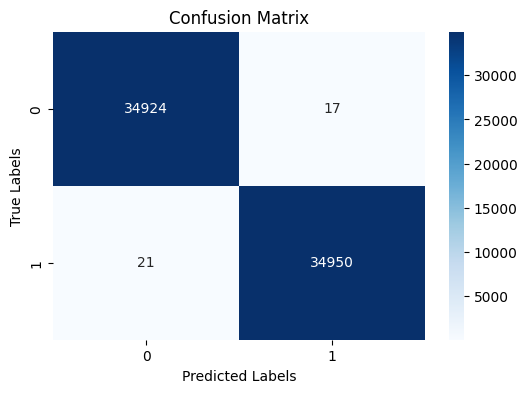

In [31]:
y_preds_dtc = model_dtc.predict(X_test)
print("Detection Accuracy: ",accuracy_score(Y_test, y_preds_dtc)*100,"%")
print("Classification Report:")
print(classification_report(Y_test, y_preds_dtc))

cm = confusion_matrix(Y_test, y_preds_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Detection Accuracy:  90.540965785559 %
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     34941
           1       0.96      0.85      0.90     34971

    accuracy                           0.91     69912
   macro avg       0.91      0.91      0.91     69912
weighted avg       0.91      0.91      0.91     69912



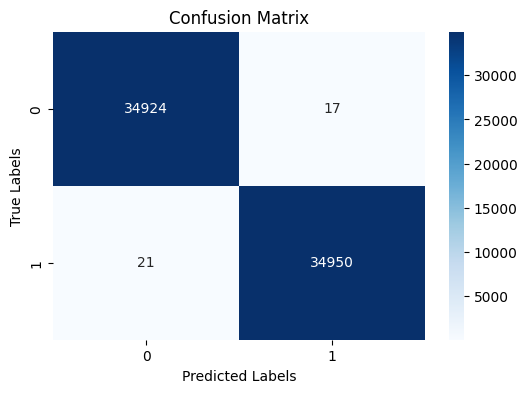

In [36]:
y_preds_nb = model_nb.predict(X_test)
print("Detection Accuracy: ",accuracy_score(Y_test, y_preds_nb)*100,"%")
print("Classification Report:")
print(classification_report(Y_test, y_preds_nb))

cm = confusion_matrix(Y_test, y_preds_dtc)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

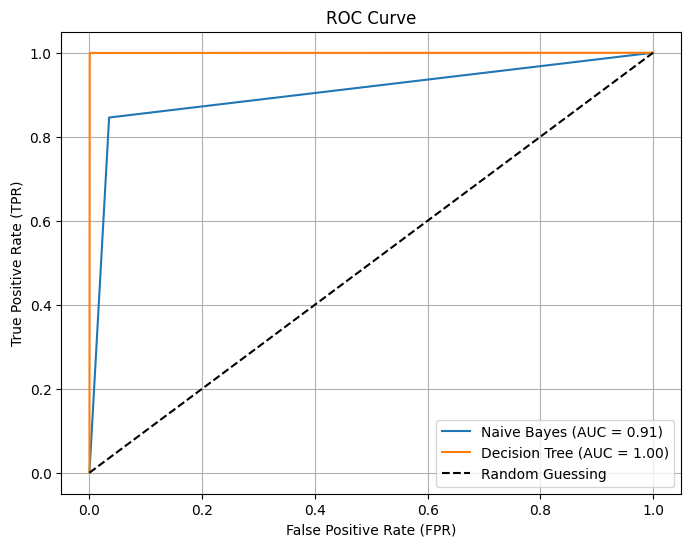

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_preds_nb)
auc_nb = roc_auc_score(Y_test, y_preds_nb)

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_preds_dtc)
auc_dt = roc_auc_score(Y_test, y_preds_dtc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()